In [2]:
import pandas as pd

# Load data

### From csv

In [3]:
multas=pd.read_csv("/Users/elena/Downloads/201711_detalle.csv",sep=";",encoding='latin1')


# Describe the data

In [4]:
multas.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',
       'COORDENADA_X', 'COORDENADA_Y'],
      dtype='object')

In [23]:
multas.dtypes

CALIFICACION     object
LUGAR            object
MES               int64
ANIO              int64
HORA            float64
IMP_BOL         float64
DESCUENTO        object
PUNTOS            int64
DENUNCIANTE      object
HECHO-BOL        object
VEL_LIMITE       object
VEL_CIRCULA      object
COORDENADA_X     object
COORDENADA_Y     object
dtype: object

In [27]:
multas.select_dtypes('int').columns

Index(['MES', 'ANIO', 'PUNTOS'], dtype='object')

In [28]:
multas.select_dtypes('float').columns

Index(['HORA', 'IMP_BOL'], dtype='object')

# Transform the data

We see that HORA is a float. Let's convert año,mes y hora to a date. Never did it? Let's build a string to test and look to the most useful shortcut : ? If we concatenate month ano and hora we can have something resembling a date format: '201611 21:15'

In [10]:
prueba='2016113021.20'

In [39]:
pd.Timestamp?

In [12]:
prueba_date=pd.to_datetime(prueba,format = "%Y%m%d%H.%M")

It works! Let's create a function and apply it to the whole dataframe creating a new column called 'date'

In [135]:
def createDate(row):
    anio=str(row['ANIO'])
    month=str(row['MES']).zfill(2)
    hora=str(row['HORA'])
    a_concat=anio+month+'01'+hora
    return pd.to_datetime(a_concat,format = "%Y%m%d%H.%M")

In [6]:
multas.loc[:,'date']=multas.apply(lambda x: createDate(x),1)

In [92]:
multas.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',
       'COORDENADA_X', 'COORDENADA_Y', 'date'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt

# Visualize the data

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text xticklabel objects>)

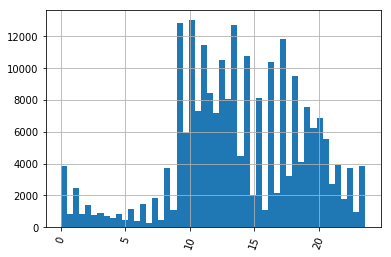

In [19]:
multas.HORA.hist(bins=50)
plt.xticks(rotation=70)

In [ ]:
multas.groupby("date").date.count().sort_values(ascending=False)

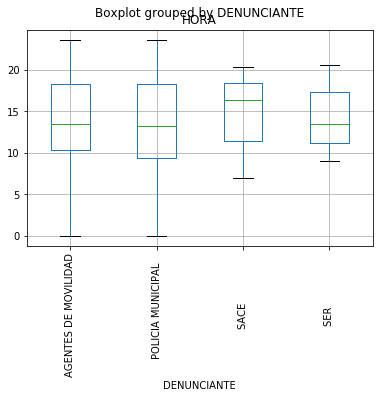

In [24]:
multas.boxplot(by='DENUNCIANTE',column=['HORA'],rot=90)


In [31]:
denunciante_grouped=multas.groupby(["DENUNCIANTE","date"]).date.count().sort_values(ascending=False)

In [34]:
multas['date'].apply(lambda x: x.hour).head()

0    21
1    21
2     9
3    21
4     1
Name: date, dtype: int64

In [35]:
multas.loc[:,'date_hour']=multas['date'].apply(lambda x: x.hour)

In [36]:
denunciante_grouped_hour=multas.groupby(["DENUNCIANTE","date_hour"]).date_hour.count().sort_values(ascending=False)

In [38]:
denunciante_grouped_hour.unstack(0)

DENUNCIANTE,AGENTES DE MOVILIDAD,POLICIA MUNICIPAL,SACE,SER
date_hour,,,,
0,2082.0,2593.0,NaN,NaN
1,1430.0,1836.0,NaN,NaN
2,807.0,1392.0,NaN,NaN
3,504.0,1128.0,NaN,NaN
4,356.0,1041.0,NaN,NaN
5,374.0,1232.0,NaN,NaN
6,500.0,1403.0,NaN,NaN
7,856.0,1505.0,14.0,NaN
8,2329.0,2653.0,54.0,NaN


Which reasons are fines set in Madrid?

In [83]:
multas.groupby("HECHO-BOL").date.count().sort_values(ascending=False)

HECHO-BOL
NO RESPETAR LAS SEÑALES EN UNA VÍA DE CIRCULACIÓN RESTRINGIDA O RESERVADA.                                                       55461
SOBREPASAR LA VELOCIDADMÁXIMA EN VÍAS LIMITADAS EN 60 km/h O MÁS.                                                                36381
ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓN, EN LUGAR HABILITADO PARA EL ESTACIONAMIENTO CON LIMITACIÓN HORARIA.             32761
ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTABLECIDAS POR ALTA CONTAMINACIÓN                                                     17576
ESTACIONAR EN LUGAR PROHIBIDO DEBIDAMENTE SEÑALIZADO.                                                                            15671
ESTACIONAR CON AUTORIZACIÓN EN LUGAR HABILITADO PARA EL ESTACIONAMIENTO CON LIMITACIÓNHORARIA,REBASANDO EL TIEMPO MÁXIMO         15207
ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA.                                                                                           15078
SOBREPASAR LA VELOCIDADMÁXIMA EN VÍAS LIMITAD

How much money does the cityhall get for the fines?

In [41]:
multas.groupby('HECHO-BOL')['IMP_BOL'].agg(['sum', 'count']).sort_values('sum',ascending=False).head(10)

,sum,count
HECHO-BOL,,
NO RESPETAR LAS SEÑALES EN UNA VÍA DE CIRCULACIÓN RESTRINGIDA O RESERVADA.,4991490.0,55461
SOBREPASAR LA VELOCIDADMÁXIMA EN VÍAS LIMITADAS EN 60 km/h O MÁS.,3783200.0,36381
"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓN, EN LUGAR HABILITADO PARA EL ESTACIONAMIENTO CON LIMITACIÓN HORARIA.",2948490.0,32761
SOBREPASAR LA VELOCIDADMÁXIMA EN VÍAS LIMITADAS HASTA 50km/h.,1687000.0,10309
ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTABLECIDAS POR ALTA CONTAMINACIÓN,1581840.0,17576
ESTACIONAR EN LUGAR PROHIBIDO DEBIDAMENTE SEÑALIZADO.,1410390.0,15671
ESTACIONAR EN CARRIL DE CIRCULACION.,1145400.0,5727
ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA.,904680.0,15078
ESTACIONAR EN DOBLE FILA.,569800.0,2849


We can also set a name to the grouped columns

In [39]:
multas.groupby("HECHO-BOL").IMP_BOL.agg({'count': len,'importe': sum}).sort_values('importe',ascending=False)

/Users/elena/miniconda3/envs/pandas_tut/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,count,importe
HECHO-BOL,,
NO RESPETAR LAS SEÑALES EN UNA VÍA DE CIRCULACIÓN RESTRINGIDA O RESERVADA.,55461.0,4991490.0
SOBREPASAR LA VELOCIDADMÁXIMA EN VÍAS LIMITADAS EN 60 km/h O MÁS.,36381.0,3783200.0
"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓN, EN LUGAR HABILITADO PARA EL ESTACIONAMIENTO CON LIMITACIÓN HORARIA.",32761.0,2948490.0
SOBREPASAR LA VELOCIDADMÁXIMA EN VÍAS LIMITADAS HASTA 50km/h.,10309.0,1687000.0
ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTABLECIDAS POR ALTA CONTAMINACIÓN,17576.0,1581840.0
ESTACIONAR EN LUGAR PROHIBIDO DEBIDAMENTE SEÑALIZADO.,15671.0,1410390.0
ESTACIONAR EN CARRIL DE CIRCULACION.,5727.0,1145400.0
ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA.,15078.0,904680.0
ESTACIONAR EN DOBLE FILA.,2849.0,569800.0


# Data selection and filtering

In [48]:
cond = multas["HECHO-BOL"].apply(lambda x: x.strip(" ")=="ESTACIONAR EN CARRIL DE CIRCULACION.")
cond.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: HECHO-BOL, dtype: bool

In [49]:
multas[cond]

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA_X,COORDENADA_Y
728,GRAVE,CL RIOS ROSAS 57,11,2017,17.31,200.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACION. ...,,,,
1399,GRAVE,CL ORENSE 16,11,2017,13.53,200.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACION. ...,,,,
2014,GRAVE,CL SANTA ENGRACIA 160,11,2017,18.46,200.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACION. ...,,,,
2020,GRAVE,CL PONZANO 85,11,2017,18.54,200.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACION. ...,,,,
2115,GRAVE,CL MODESTO LAFUENTE 47,11,2017,20.01,200.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACION. ...,,,,
2116,GRAVE,CL MODESTO LAFUENTE 50,11,2017,20.07,200.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACION. ...,,,,
2365,GRAVE,PO DIRECCION 122,11,2017,20.16,200.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACION. ...,,,,
3136,GRAVE,CL TABLADA 58,11,2017,20.05,200.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACION. ...,,,,
3161,GRAVE,CL SAN AQUILINO 30,11,2017,9.55,200.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACION. ...,,,,
3879,GRAVE,PO DIRECCION 122,11,2017,9.42,200.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACION. ...,,,,


Why we don't select a row with "PO ESPERANZA" if we have seen that place in a row before? It's not trimmed!

In [65]:
multas[multas["LUGAR"]=="PO ESPERANZA 49"]

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA_X,COORDENADA_Y,date,date_hour


In [49]:
cond=multas["LUGAR"].apply(lambda x: x.strip(" ")=="PO ESPERANZA 49")
multas[cond]

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA_X,COORDENADA_Y,date,date_hour
0,LEVE,PO ESPERANZA 49,11,2017,21.15,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA Y HORARIO DE CARGA Y DESCAR...,,,,,2017-11-30 21:15:00,21
1,LEVE,PO ESPERANZA 49,11,2017,21.12,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA Y HORARIO DE CARGA Y DESCAR...,,,,,2017-11-30 21:12:00,21
2,LEVE,PO ESPERANZA 49,11,2017,9.20,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA Y HORARIO DE CARGA Y DESCAR...,,,,,2017-11-30 09:02:00,9
3,LEVE,PO ESPERANZA 49,11,2017,21.10,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA Y HORARIO DE CARGA Y DESCAR...,,,,,2017-11-30 21:01:00,21
35452,LEVE,PO ESPERANZA 49,11,2017,20.02,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,,2017-11-30 20:02:00,20
52362,LEVE,PO ESPERANZA 49,11,2017,11.46,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,,2017-11-30 11:46:00,11
171569,LEVE,PO ESPERANZA 49,11,2017,21.28,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA Y HORARIO DE CARGA Y DESCAR...,,,,,2017-11-30 21:28:00,21
194486,LEVE,PO ESPERANZA 49,11,2017,21.50,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA Y HORARIO DE CARGA Y DESCAR...,,,,,2017-11-30 21:05:00,21
194495,LEVE,PO ESPERANZA 49,11,2017,21.45,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA Y HORARIO DE CARGA Y DESCAR...,,,,,2017-11-30 21:45:00,21
194496,LEVE,PO ESPERANZA 49,11,2017,21.50,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA Y HORARIO DE CARGA Y DESCAR...,,,,,2017-11-30 21:05:00,21


In [67]:
multas[multas['date_hour']==9]

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA_X,COORDENADA_Y,date,date_hour
2,LEVE,PO ESPERANZA 49,11,2017,9.20,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA Y HORARIO DE CARGA Y DESCAR...,,,,,2017-11-30 09:02:00,9
43,LEVE,CL MAURICIO LEGENDRE 15,11,2017,9.17,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,,2017-11-30 09:17:00,9
83,LEVE,CL MELCHOR FERNANDEZ ALMAGRO 4,11,2017,9.35,90.0,SI,0,SER,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,,,,,2017-11-30 09:35:00,9
91,LEVE,CL BEATRIZ DE BOBADILLA 11,11,2017,9.50,90.0,SI,0,SER,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,,,,,2017-11-30 09:05:00,9
95,LEVE,CL BEATRIZ DE BOBADILLA 7,11,2017,9.55,90.0,SI,0,SER,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,,,,,2017-11-30 09:55:00,9
112,GRAVE,TRAMO AV CORDOBA GT CADIZ-F64,11,2017,9.14,100.0,SI,0,AGENTES DE MOVILIDAD,SOBREPASAR LA VELOCIDAD MEDIA EN TRAMO CONTROL...,,,,,2017-11-30 09:14:00,9
113,GRAVE,TRAMO AV CORDOBA GT CADIZ-F64,11,2017,9.23,100.0,SI,0,AGENTES DE MOVILIDAD,SOBREPASAR LA VELOCIDAD MEDIA EN TRAMO CONTROL...,,,,,2017-11-30 09:23:00,9
114,GRAVE,TRAMO AV CORDOBA GT CADIZ-F64,11,2017,9.52,100.0,SI,0,AGENTES DE MOVILIDAD,SOBREPASAR LA VELOCIDAD MEDIA EN TRAMO CONTROL...,,,,,2017-11-30 09:52:00,9
115,GRAVE,TRAMO AV CORDOBA GT CADIZ-F64,11,2017,9.53,100.0,SI,0,AGENTES DE MOVILIDAD,SOBREPASAR LA VELOCIDAD MEDIA EN TRAMO CONTROL...,,,,,2017-11-30 09:53:00,9
166,GRAVE,TRAMO AV CORDOBA GT CADIZ-F64,11,2017,9.15,100.0,SI,0,AGENTES DE MOVILIDAD,SOBREPASAR LA VELOCIDAD MEDIA EN TRAMO CONTROL...,,,,,2017-11-30 09:15:00,9


In [ ]:
multas_index_hora=multas.set_index('date_hour')

Selecting by index

In [66]:
 multas_index_hora.loc[9]

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA_X,COORDENADA_Y,date
date_hour,,,,,,,,,,,,,,,
9,LEVE,PO ESPERANZA 49,11,2017,9.20,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA Y HORARIO DE CARGA Y DESCAR...,,,,,2017-11-30 09:02:00
9,LEVE,CL MAURICIO LEGENDRE 15,11,2017,9.17,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,,2017-11-30 09:17:00
9,LEVE,CL MELCHOR FERNANDEZ ALMAGRO 4,11,2017,9.35,90.0,SI,0,SER,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,,,,,2017-11-30 09:35:00
9,LEVE,CL BEATRIZ DE BOBADILLA 11,11,2017,9.50,90.0,SI,0,SER,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,,,,,2017-11-30 09:05:00
9,LEVE,CL BEATRIZ DE BOBADILLA 7,11,2017,9.55,90.0,SI,0,SER,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,,,,,2017-11-30 09:55:00
9,GRAVE,TRAMO AV CORDOBA GT CADIZ-F64,11,2017,9.14,100.0,SI,0,AGENTES DE MOVILIDAD,SOBREPASAR LA VELOCIDAD MEDIA EN TRAMO CONTROL...,,,,,2017-11-30 09:14:00
9,GRAVE,TRAMO AV CORDOBA GT CADIZ-F64,11,2017,9.23,100.0,SI,0,AGENTES DE MOVILIDAD,SOBREPASAR LA VELOCIDAD MEDIA EN TRAMO CONTROL...,,,,,2017-11-30 09:23:00
9,GRAVE,TRAMO AV CORDOBA GT CADIZ-F64,11,2017,9.52,100.0,SI,0,AGENTES DE MOVILIDAD,SOBREPASAR LA VELOCIDAD MEDIA EN TRAMO CONTROL...,,,,,2017-11-30 09:52:00
9,GRAVE,TRAMO AV CORDOBA GT CADIZ-F64,11,2017,9.53,100.0,SI,0,AGENTES DE MOVILIDAD,SOBREPASAR LA VELOCIDAD MEDIA EN TRAMO CONTROL...,,,,,2017-11-30 09:53:00


## Which are the most expensive fines?

In [68]:
importes = multas[['HECHO-BOL',"IMP_BOL"]].drop_duplicates()


In [69]:
importes.sort_values("IMP_BOL",ascending= False)

,HECHO-BOL,IMP_BOL
162204,CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANIS...,1000.0
164570,INCUMPLIR LA OBLIGACIÓNDE SOMETERSE A LAS PRUE...,1000.0
12506,CONDUCIR CON UNA TASA DE ALCOHOLEMIA NO PERMIT...,1000.0
192357,CONDUCCION TEMERARIA: CIRCULAR DIRECCION PROHI...,500.0
173490,CONDUCCION TEMERARIA: EN VIA DE 70 KM H A GRAN...,500.0
187664,CONDUCCION TEMERARIA: CAMBIO DE SENTIDO BRUSCO...,500.0
229066,CONDUCCION TEMERARIA: CONDUCIR EL VHO CON UN M...,500.0
187620,CONDUCCION TEMERARIA: REBASAR SEMAFORO ROJO CU...,500.0
193392,CONDUCCION TEMERARIA: CIRCULA GRAN VELOCIDAD C...,500.0
186472,CONDUCCION TEMERARIA: REALIZA CAMBIO DE CARRIL...,500.0


## Which fines affect...

Let's create a function to return True/False depending if a word is included in the input string

In [71]:
def isWordInString(a,strA):
    if a.find(strA)!=-1:
        isIn=True
    else:
        isIn=False
    return isIn

 ### bike riders?

Let's apply the function to the column "HECHO-BOL"

In [82]:
importes[importes.apply(lambda x: isWordInString(x["HECHO-BOL"],"BICICLETA"),1)]

,HECHO-BOL,IMP_BOL
184375,CIRCULAR EN BICICLETA POR ACERAS Y ZONAS PEATO...,60.0
185270,CIRCULAR EN BICICLETA POR CALLE PEATONAL A VEL...,60.0
188164,NO UTILIZAR EL ALUMBRADO ADECUADO EN BICICLETA...,60.0
192521,CIRCULAR EN BICICLETA SIN ELEMENTOS REFLECTANT...,60.0


 ### drunk drivers?

In [83]:
importes[importes.apply(lambda x: isWordInString(x["HECHO-BOL"],"ALCOHOLEMIA"),1)]

,HECHO-BOL,IMP_BOL
12506,CONDUCIR CON UNA TASA DE ALCOHOLEMIA NO PERMIT...,1000.0
162200,CONDUCIR CON UNA TASA DE ALCOHOLEMIA NO PERMIT...,500.0
188472,CONDUCCION NEGLIGENTE: SALTA CONTROL DE ALCOHO...,200.0


 ### parking?

In [72]:
importes[importes.apply(lambda x: isWordInString(x["HECHO-BOL"],"ESTACIONAR"),1)].head(10)

,HECHO-BOL,IMP_BOL
0,ESTACIONAR EN ZONA Y HORARIO DE CARGA Y DESCAR...,90.0
4,ESTACIONAR EN ZONA SEÑALIZADA PARA USO EXCLUSI...,200.0
5,ESTACIONAR EN LUGAR PROHIBIDO DEBIDAMENTE SEÑA...,90.0
6,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,90.0
9,ESTACIONAR POR TIEMPO SUPERIOR A 30 MINUTOS EN...,90.0
10,ESTACIONAR OBSTACULIZANDO LA UTILIZACIÓN DE ZO...,200.0
12,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",90.0
19,ESTACIONAR SOBRE LA ACERA OBSTACULIZANDO GRAVE...,200.0
28,ESTACIONAR EN DOBLE FILA. ...,200.0
32,ESTACIONAR CON AUTORIZACIÓN EN LUGAR HABILITAD...,30.0


## Create a new column to summarize types of fines

Let's create a new column which summarizes the type of fine depending on a given list of possible types

In [76]:
import re
def whichWordInString(a,items):
    isIn=None
    for strA in items:
        expr=re.search(strA,a)
        if expr:
            isIn=expr[0]
    return isIn


What does this function do?

In [83]:
list_words=["ESTACIONAR","CIRCULAR","VELOCIDAD","OBEDECER","BICICLETA","ALCOHOLEMIA","SEMÁFORO"]


In [84]:
whichWordInString("ESTACIONAR EN DOBLE FILA",list_words)


'ESTACIONAR'

In [85]:
whichWordInString("CIRCULAR EN BICICLETA POR CALLE PEATONAL",list_words)

'BICICLETA'

Let's apply this function to the column "HECHO-BOL" of the dataframe

In [86]:
multas.apply(lambda x: whichWordInString(x["HECHO-BOL"],list_words),1).head(10)


0    ESTACIONAR
1    ESTACIONAR
2    ESTACIONAR
3    ESTACIONAR
4    ESTACIONAR
5    ESTACIONAR
6    ESTACIONAR
7    ESTACIONAR
8    ESTACIONAR
9    ESTACIONAR
dtype: object

Once we checked it works, let's create a new column "MOTIVO" by

In [88]:
multas.loc[:,"MOTIVO"]=multas.apply(lambda x: whichWordInString(x["HECHO-BOL"],list_words),1)

In [89]:
multas.groupby("MOTIVO")["IMP_BOL"].agg(['count','sum']).sort_values('sum')

,count,sum
MOTIVO,,
BICICLETA,15,900.0
OBEDECER,11,2200.0
CIRCULAR,569,136830.0
ALCOHOLEMIA,530,420700.0
SEMÁFORO,2121,423760.0
VELOCIDAD,47760,5582750.0
ESTACIONAR,123076,11684170.0


## When are fines set depending on type?

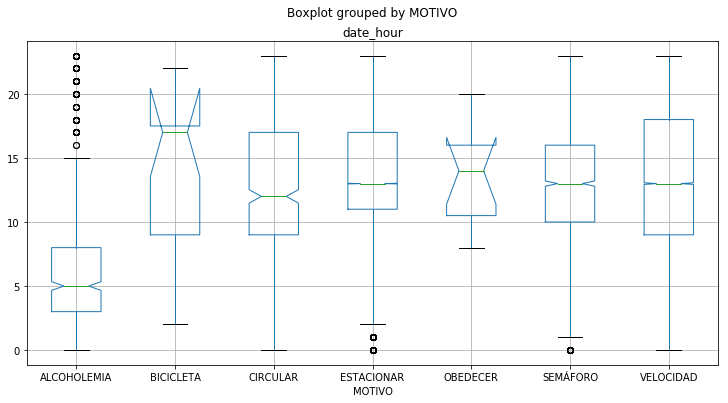

In [157]:
multas.boxplot(figsize=(12,6),by="MOTIVO",column="date_hour",notch=True)

## Who sets more fines?

In [97]:
multas.groupby(['DENUNCIANTE','MOTIVO']).MOTIVO.agg(['count']).sort_values('count',ascending=False)

count
DENUNCIANTE          MOTIVO            
SER                  ESTACIONAR   98778
POLICIA MUNICIPAL    VELOCIDAD    46359
                     ESTACIONAR   19197
AGENTES DE MOVILIDAD ESTACIONAR    2986
SACE                 ESTACIONAR    2115
AGENTES DE MOVILIDAD SEMÁFORO      1719
                     VELOCIDAD     1401
POLICIA MUNICIPAL    ALCOHOLEMIA    529
                     CIRCULAR       439
                     SEMÁFORO       402
AGENTES DE MOVILIDAD CIRCULAR       130
POLICIA MUNICIPAL    BICICLETA       15
AGENTES DE MOVILIDAD OBEDECER        11
                     ALCOHOLEMIA      1

## Where are parking fines set?

In [101]:
df_estacionar=multas[multas.MOTIVO=='ESTACIONAR']
df_estacionar.groupby("LUGAR")['IMP_BOL'].agg(['count','sum']).sort_values('sum',ascending=False).head(10)

,count,sum
LUGAR,,
AEROPUERTO SALIDA T 1,359,33410.0
AEROPUERTO SALIDA T 4,266,26250.0
RETABLO DE MELISENDRA SN,109,21550.0
AEROPUERTO LLEGADA T 1,155,16560.0
CL RAFAEL SALGADO 2,251,15800.0
CL PEDRO RICO 4,209,15530.0
PROF. MTIN. ALMAGRO BASCH 1,151,12630.0
CL RIBERA DE CURTIDORES 37,141,10590.0
DR FDO C RGUEZ S/N,55,10450.0


This results only account for one month. Let's do the analysis more general

## Access data programatically

In [2]:
import pandas as pd

#### DataFrames can be loaded directly from url's! Let's build a dictionary of urls and read the data sequentially into a dictionary of dataframes that we can later on concatenate into one dataframe for all the dates

In [3]:
dates = pd.date_range("2016-10","2017-11",freq='M')
urlDates={}
for date in dates:
    year=str(date.year)
    month=str(date.month).zfill(2)
    dateStr=year+month
    urlDates[dateStr]="http://datos.madrid.es/datosabiertos/MULTAS/"+year+"/"+month+"/"+dateStr+"_detalle.txt"

Read sequentially the dataframes and save them in the values of a dictionary, with dates as keys

In [7]:
data={}
for date,url in urlDates.items():
    print(date,url)
    data[date]=pd.read_csv(url,sep='\t',encoding='latin1')#,nrows=100)

201610 http://datos.madrid.es/datosabiertos/MULTAS/2016/10/201610_detalle.txt
201611 http://datos.madrid.es/datosabiertos/MULTAS/2016/11/201611_detalle.txt
201612 http://datos.madrid.es/datosabiertos/MULTAS/2016/12/201612_detalle.txt
201701 http://datos.madrid.es/datosabiertos/MULTAS/2017/01/201701_detalle.txt
201702 http://datos.madrid.es/datosabiertos/MULTAS/2017/02/201702_detalle.txt
201703 http://datos.madrid.es/datosabiertos/MULTAS/2017/03/201703_detalle.txt
201704 http://datos.madrid.es/datosabiertos/MULTAS/2017/04/201704_detalle.txt
201705 http://datos.madrid.es/datosabiertos/MULTAS/2017/05/201705_detalle.txt
201706 http://datos.madrid.es/datosabiertos/MULTAS/2017/06/201706_detalle.txt
201707 http://datos.madrid.es/datosabiertos/MULTAS/2017/07/201707_detalle.txt
201708 http://datos.madrid.es/datosabiertos/MULTAS/2017/08/201708_detalle.txt
201709 http://datos.madrid.es/datosabiertos/MULTAS/2017/09/201709_detalle.txt
201710 http://datos.madrid.es/datosabiertos/MULTAS/2017/10/20171

Iterate over the values of this dictionary and merge the dataframe into one.

In [8]:
multas_alldates=pd.DataFrame()
for df in data.values():
    multas_alldates=pd.concat([multas_alldates,df])
    print(df.CALIFICACION.count(),multas_alldates.CALIFICACION.count())

246000 246000
229209 475209
211752 686961
239258 926219
244416 1170635
264610 1435245
238636 1673881
237808 1911689
246991 2158680
235099 2393779
192373 2586152
248410 2834562
249024 3083586


Save the dataframe into a serialized pickle just in case the jupyter-notebook restarts!

In [9]:
multas_alldates.to_pickle('./multas_alldates.p')

In [103]:
multas_alldates=pd.read_pickle('./multas_alldates.p')

## Check if data is correctly formatted

In [14]:
multas_alldates.head()

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA_X,COORDENADA_Y
0,GRAVE,RICARDO ORTIZ 60,10,2016,16.20,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN MEDIO DE LA CALZADA. ...,,,,
1,LEVE,PZ FONSAGRADA 10,10,2016,10.53,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
2,LEVE,MARIANO FERNANDEZ 4,10,2016,17.03,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
3,GRAVE,SAN JENARO FAROLA 17,10,2016,13.20,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDADMÁXIMA EN VÍAS LIMITADA...,40,60,,
4,GRAVE,PO CHOPERA 47,10,2016,21.55,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR OBSTACULIZANDO LA UTILIZACIÓN DE UN...,,,,


In [104]:
pd.unique(multas_alldates['MES']),pd.unique(multas_alldates['ANIO'])

(array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9]), array([2016, 2017]))

Describe does not take into account nan values, count does. Here we can see data has already been cleaned

In [105]:
multas_alldates.count()

CALIFICACION    3083586
LUGAR           3083586
MES             3083586
ANIO            3083586
HORA            3083586
IMP_BOL         3083586
DESCUENTO       3083586
PUNTOS          3083586
DENUNCIANTE     3083586
HECHO-BOL       3083586
VEL_LIMITE      3083586
VEL_CIRCULA     3083586
COORDENADA_X    3083586
COORDENADA_Y    3083586
dtype: int64

In [11]:
multas_alldates.describe()

,MES,ANIO,HORA,IMP_BOL,PUNTOS
count,3.083586e+06,3.083586e+06,3.083586e+06,3.083586e+06,3.083586e+06
mean,6.674171e+00,2.016777e+03,1.382022e+01,1.017892e+02,1.429751e-01
std,3.444169e+00,4.161119e-01,4.928978e+00,6.461687e+01,7.143883e-01
min,1.000000e+00,2.016000e+03,0.000000e+00,3.000000e+01,0.000000e+00
25%,4.000000e+00,2.017000e+03,1.050000e+01,9.000000e+01,0.000000e+00
50%,7.000000e+00,2.017000e+03,1.344000e+01,9.000000e+01,0.000000e+00
75%,1.000000e+01,2.017000e+03,1.749000e+01,1.000000e+02,0.000000e+00
max,1.200000e+01,2.017000e+03,2.359000e+01,1.000000e+03,6.000000e+00


Let's add "MOTIVO" column to the complete dataframe

In [106]:
multas_alldates.loc[:,"MOTIVO"]=multas_alldates.apply(lambda x: whichWordInString(x["HECHO-BOL"],list_words),1)

In [107]:
multas_alldates.groupby('MOTIVO')['IMP_BOL'].agg(['sum','count']).sort_values('sum',ascending=False)

,sum,count
MOTIVO,,
ESTACIONAR,147348810.0,1622514
VELOCIDAD,78083800.0,647713
SEMÁFORO,8999520.0,45046
ALCOHOLEMIA,5570400.0,6964
CIRCULAR,1975210.0,9285
OBEDECER,66700.0,332
BICICLETA,15240.0,247


## Who sets more fines and why?

In [155]:
multas_alldates.groupby(['DENUNCIANTE','MOTIVO'])['IMP_BOL'].agg(['sum','count']).sort_values('sum',ascending=False)

sum    count
DENUNCIANTE          MOTIVO                           
SER                  ESTACIONAR   108525540.0  1362975
POLICIA MUNICIPAL    VELOCIDAD     76659300.0   634111
                     ESTACIONAR    30090880.0   203321
AGENTES DE MOVILIDAD SEMÁFORO       7801560.0    39010
POLICIA MUNICIPAL    ALCOHOLEMIA    5553400.0     6945
AGENTES DE MOVILIDAD ESTACIONAR     5302130.0    38289
SACE                 ESTACIONAR     3430260.0    17929
POLICIA MUNICIPAL    CIRCULAR       1698960.0     7521
AGENTES DE MOVILIDAD VELOCIDAD      1424500.0    13602
POLICIA MUNICIPAL    SEMÁFORO       1197960.0     6036
AGENTES DE MOVILIDAD CIRCULAR        276250.0     1764
                     OBEDECER         59000.0      295
                     ALCOHOLEMIA      17000.0       19
POLICIA MUNICIPAL    BICICLETA        14340.0      232
                     OBEDECER          7700.0       37
AGENTES DE MOVILIDAD BICICLETA          900.0       15

Let's add "date" and "hour" column to the complete dataframe

In [136]:
multas_alldates.loc[:,'date']=multas_alldates.apply(lambda x: createDate(x),1)

In [137]:
multas_alldates.loc[:,'date_hour']=multas_alldates['date'].apply(lambda x: x.hour)

In [138]:
multas_alldates.groupby(['ANIO','MES','date_hour','DENUNCIANTE','MOTIVO'])['IMP_BOL'].agg(['sum','count']).sort_values('sum',ascending=False)

sum  count
ANIO MES date_hour DENUNCIANTE          MOTIVO                      
2017 3   10        SER                  ESTACIONAR  1272340.0  14524
         13        SER                  ESTACIONAR  1156870.0  14708
     2   10        SER                  ESTACIONAR  1151700.0  13217
     6   10        SER                  ESTACIONAR  1139070.0  13505
     2   13        SER                  ESTACIONAR  1134640.0  14529
     5   10        SER                  ESTACIONAR  1125490.0  13224
     9   10        SER                  ESTACIONAR  1124180.0  13330
2016 10  10        SER                  ESTACIONAR  1102450.0  12966
2017 1   10        SER                  ESTACIONAR  1097050.0  13069
     10  10        SER                  ESTACIONAR  1095260.0  12571
     3   11        SER                  ESTACIONAR  1090940.0  13267
     4   10        SER                  ESTACIONAR  1078810.0  12512
     6   9         SER                  ESTACIONAR  1074020.0  12253
     3   9         SER                  ESTACIONAR  1062240.0  11995
     2   9         SER                  ESTACIONAR  1039620.0  11663
     5   13        SER                  ESTACIONAR  1039450.0  13668
     8   10        SER                  ESTACIONAR  1038840.0  12504
     6   13        SER                  ESTACIONAR  1035260.0  13923
     1   13        SER                  ESTACIONAR  1022150.0  13119
     10  9         SER                  ESTACIONAR  1004130.0  11333
     2   11        SER                  ESTACIONAR  1002030.0  12145
     5   9         SER                  ESTACIONAR   998610.0  11307
     9   9         SER                  ESTACIONAR   996540.0  11429
     5   11        SER                  ESTACIONAR   995360.0  12313
2016 11  10        SER                  ESTACIONAR   994100.0  11705
2017 4   9         SER                  ESTACIONAR   992790.0  11201
     10  13        SER                  ESTACIONAR   991430.0  12647
     6   11        SER                  ESTACIONAR   990030.0  12521
     8   9         SER                  ESTACIONAR   982700.0  11259
     9   13        SER                  ESTACIONAR   978410.0  13125
...                                                       ...    ...
     5   3         POLICIA MUNICIPAL    BICICLETA        60.0      1
     3   8         POLICIA MUNICIPAL    BICICLETA        60.0      1
     5   10        POLICIA MUNICIPAL    BICICLETA        60.0      1
     6   1         POLICIA MUNICIPAL    BICICLETA        60.0      1
     3   9         POLICIA MUNICIPAL    BICICLETA        60.0      1
     4   12        POLICIA MUNICIPAL    BICICLETA        60.0      1
     9   23        POLICIA MUNICIPAL    BICICLETA        60.0      1
     5   2         POLICIA MUNICIPAL    BICICLETA        60.0      1
     3   16        POLICIA MUNICIPAL    BICICLETA        60.0      1
     2   17        AGENTES DE MOVILIDAD BICICLETA        60.0      1
         2         POLICIA MUNICIPAL    BICICLETA        60.0      1
     5   19        POLICIA MUNICIPAL    BICICLETA        60.0      1
     3   2         POLICIA MUNICIPAL    BICICLETA        60.0      1
     1   11        POLICIA MUNICIPAL    BICICLETA        60.0      1
     6   22        POLICIA MUNICIPAL    BICICLETA        60.0      1
     4   15        POLICIA MUNICIPAL    BICICLETA        60.0      1
     8   23        POLICIA MUNICIPAL    BICICLETA        60.0      1
     6   19        POLICIA MUNICIPAL    BICICLETA        60.0      1
     2   8         POLICIA MUNICIPAL    BICICLETA        60.0      1
     5   4         POLICIA MUNICIPAL    BICICLETA        60.0      1
2016 11  20        AGENTES DE MOVILIDAD BICICLETA        60.0      1
2017 3   21        POLICIA MUNICIPAL    BICICLETA        60.0      1
     9   21        POLICIA MUNICIPAL    BICICLETA        60.0      1
     7   13        AGENTES DE MOVILIDAD BICICLETA        60.0      1
2016 10  17        POLICIA MUNICIPAL    BICICLETA        60.0      1
2017 8   12        POLICIA MUNICIPAL    BICICLETA       

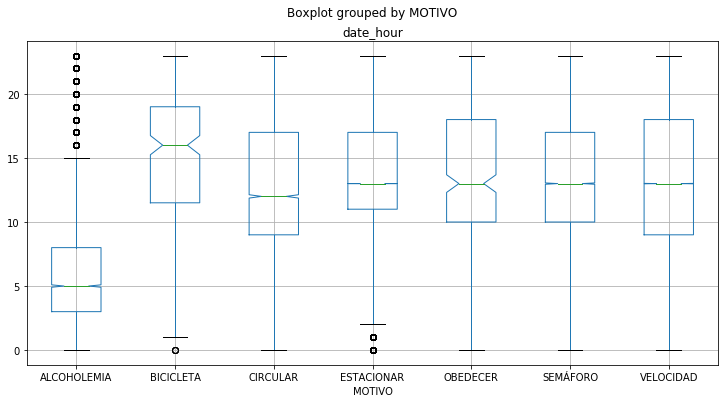

In [156]:
multas_alldates.boxplot(figsize=(12,6),by="MOTIVO",column="date_hour",notch=True)

In [141]:
multas_alldates_munic = multas_alldates[multas_alldates['DENUNCIANTE'].apply(lambda x: x.strip(" ")=="POLICIA MUNICIPAL")]
multas_alldates_munic.groupby(['ANIO','MES','MOTIVO'])['IMP_BOL'].agg(['sum','count']).sort_values('sum',ascending=False).head(10)

sum  count
ANIO MES MOTIVO                     
2017 4   VELOCIDAD  6938160.0  55772
     8   VELOCIDAD  6647920.0  57548
     3   VELOCIDAD  6539920.0  53639
     7   VELOCIDAD  6207820.0  52822
2016 10  VELOCIDAD  6202080.0  49564
2017 9   VELOCIDAD  6040500.0  50869
     1   VELOCIDAD  5820060.0  47082
     10  VELOCIDAD  5678000.0  48912
2016 11  VELOCIDAD  5367420.0  42189
     12  VELOCIDAD  5350800.0  42521

In [153]:
multas_alldates_estacionar=multas_alldates[multas_alldates.MOTIVO=='ESTACIONAR']
multas_alldates_estacionar.groupby("LUGAR")['IMP_BOL'].agg(['count','sum']).sort_values('sum',ascending=False).head(20)

,count,sum
LUGAR,,
AEROPUERTO SALIDA T 4,5290,519760.0
AEROPUERTO SALIDA T 1,5392,506420.0
AV MENENDEZ PELAYO 14,4544,286970.0
AEROPUERTO LLEGADA T 1,2105,242300.0
PROF. MTIN. ALMAGRO BASCH 1,2569,204400.0
DR FDO C RGUEZ S/N,1089,202950.0
CL RAFAEL SALGADO 2,2637,173700.0
M.BARTO.COSSIO S/N,850,146070.0
CL RIBERA DE CURTIDORES 37,1612,120960.0


In [144]:
cond1=multas_alldates_estacionar['LUGAR'].apply(lambda x: x.strip(" ")=="CL RAFAEL SALGADO 2")
cond2=multas_alldates_estacionar['LUGAR'].apply(lambda x: x.strip(" ")=="PO CASTELLANA 142")
multas_bernabeu=multas_alldates_estacionar[cond1|cond2]

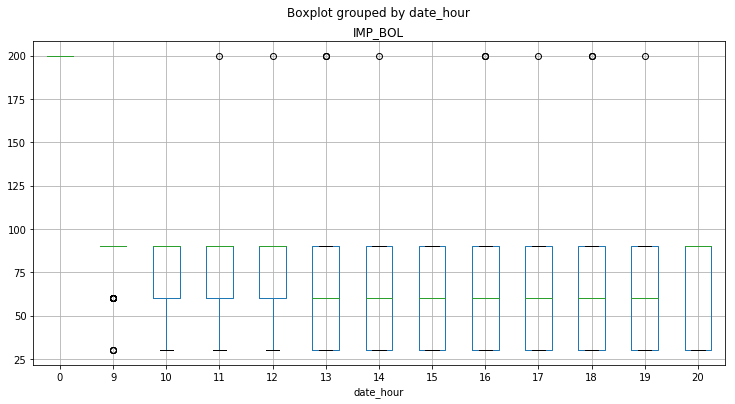

In [151]:
multas_bernabeu.boxplot(figsize=(12,6),by="date_hour",column="IMP_BOL")